# Doublets - Source and Sink on top of each other

In [1]:
import math
import numpy as np
from matplotlib import pyplot
%matplotlib  inline

In [3]:
N = 50                                   # Number of points in each direction
x_start, x_end = -2.0, 2.0               # x-direction boundaries
y_start, y_end = -1.0, 1.0               # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [42]:
kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0    # location of the doublet
x_doublet2, y_doublet2 = 1.0, 0.0

## Functions for velocities and stream functions

In [15]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = -strength / (2 * math.pi) * ((X - xd)**2 - (Y - yd)**2) / ((X - xd)**2 + (Y - yd)**2)**2
    
    v = -strength / (2 * math.pi) * 2 * (X - xd) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)**2
    
    return u, v


In [16]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
    
    psi = -strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi


In [43]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the velocity field on the mesh grid of the second doublet
u_doublet2, v_doublet2 = get_velocity_doublet(kappa, x_doublet2, y_doublet2, X, Y)

# compute the stream-function on the mesh grid of the second doublet
psi_doublet2 = get_stream_function_doublet(kappa, x_doublet2, y_doublet2, X, Y)

## Visualizing the streamlines of the doublet

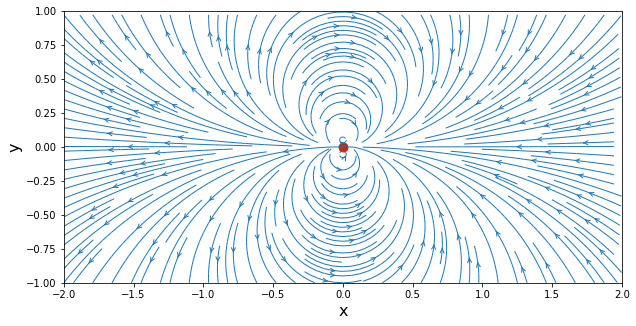

In [46]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');


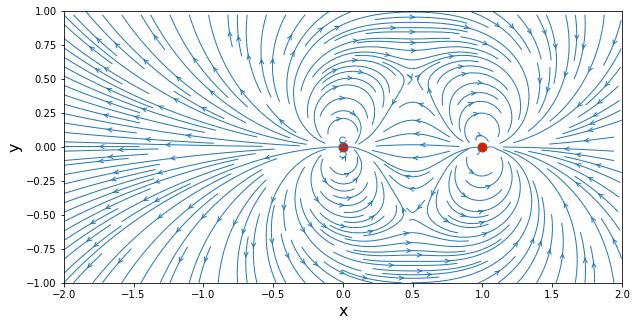

In [48]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet + u_doublet2, v_doublet+ v_doublet2, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');
pyplot.scatter(x_doublet2, y_doublet2, color='#CD2305', s=80, marker='o');

## Velocity Potential of the Doublet

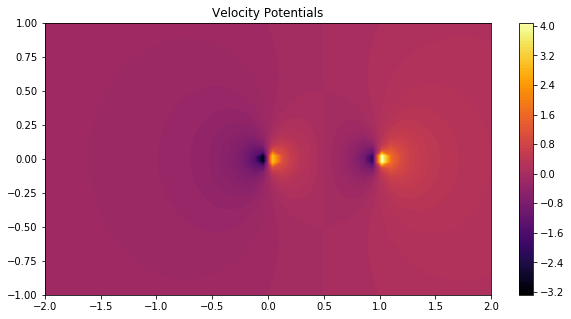

In [53]:
phi1 = (kappa / (2*math.pi)) * X / (X**2 + Y**2)
phi2 = (kappa / (2*math.pi)) * (X-x_doublet2) / ((X-x_doublet2)**2 + (Y-y_doublet2)**2)
phi = phi1 + phi2

pyplot.figure(figsize=(10.0, 5.0))
pyplot.title('Velocity Potentials')
pyplot.contourf(X, Y, phi , 100, cmap='inferno')
pyplot.colorbar(extend='both');

## Uniform Flow Past a Doublet

In [54]:
u_inf = 1.0     #free stream velocity

In [55]:
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

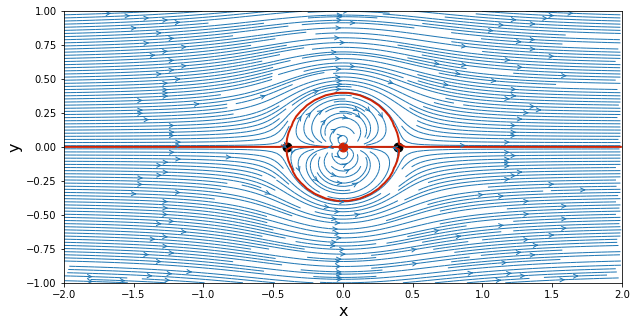

In [56]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=3, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='black', s=80, marker='o');

#### Challenge Question

What is the radius of the circular cylinder created when a doublet of strength $\kappa$ is added to a uniform flow $U_\infty$ in the $x$-direction?

## Bernoulli's Equation and the Pressure Coefficient

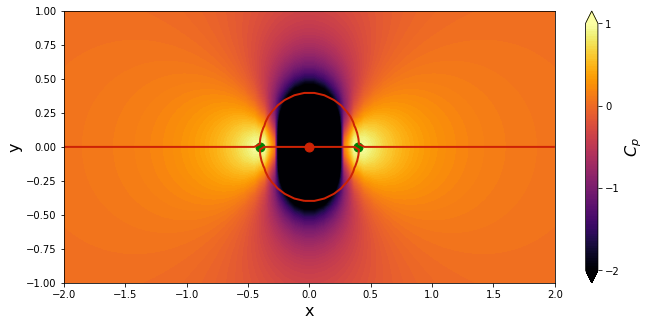

In [58]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

contf = pyplot.contourf(X, Y, cp, levels=np.linspace(-2.0, 1.0, 100), extend='both', cmap='inferno')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],color='g', s=80, marker='o');

#### Challeng Task

Show that the pressure coefficient distribution on the surface of the circular cylinder is given by

$$C_p = 1-4\sin^2\theta$$

and plot the coefficient of pressure versus the angle.

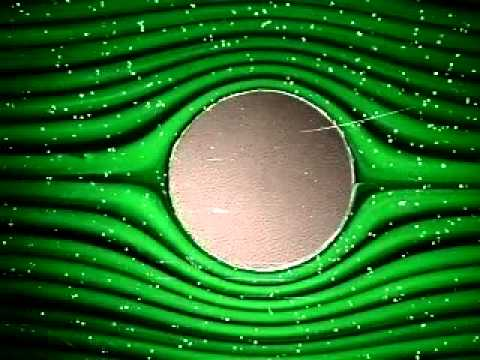

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ekd8czwELOc')